In [1]:
import copy
#packages we'll need

%matplotlib inline 
#this is a ``magic command'' specific to display plots in-line in a jupyter notebook
#normally you would plot by calling a plt.show()


from matplotlib.colors import LogNorm
#need this for the colourbar of the 2D histogram

%run MonteCarlo.ipynb
%run DataAnalysis.ipynb

In [2]:
mc = DataAnalysis(load=True, eventfile="data/moo/MC_eventdf.csv", clusterfile="data/moo/MC_clusterdf.csv")

In [3]:
data = DataAnalysis(load=True, eventfile="data/moo/eventdf.csv", clusterfile='data/moo/Basic_clusterdf.csv')
#data = DataAnalysis()
#data.set_eventdf(mc.get_eventdf())

Text(0, 0.5, 'Number of Channels')

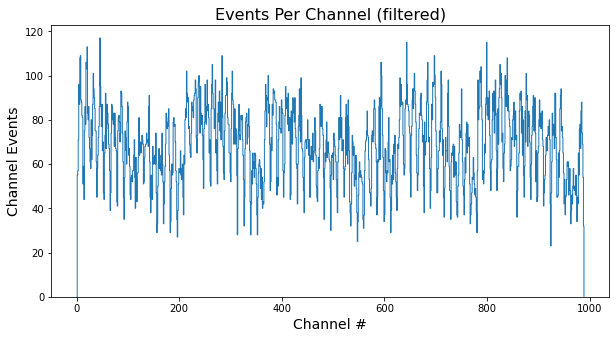

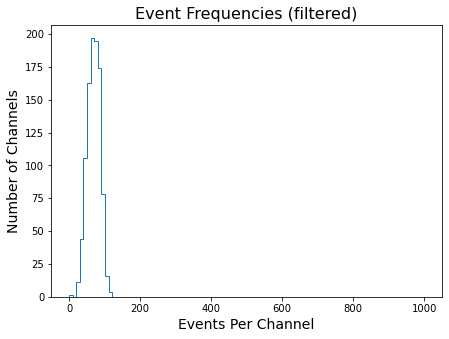

In [4]:
plt.figure(figsize=(10,5)) # lets you make a custom size for your plot
#array1=plt.hist(data.get_eventdf()['Channel'].values, np.linspace(0,989,990) , histtype='step', color='r')#np.linspace function is hlepful for generating bins
array1 = plt.hist(mc.get_eventdf()['Channel'].values, np.linspace(0,989,990), histtype='step')#np.linspace function is hlepful for generating bins
plt.title("Events Per Channel (filtered)", fontsize=16)
plt.xlabel('Channel #',fontsize=14)
plt.ylabel('Channel Events',fontsize=14)
#plt.gca().set_yscale("log")


#plt.savefig('plots/pdf/EventsPerChannel.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/EventsPerChannel.png',dpi=300,bbox_inches = "tight")


plt.figure(figsize=(7,5))
plt.hist(array1[0], np.linspace(0,1000,100), histtype='step')
#plt.hist(array2[0], np.linspace(1,6,100),color='b', histtype='step')
plt.title("Event Frequencies (filtered)",fontsize=16)
plt.xlabel('Events Per Channel',fontsize=14)
plt.ylabel('Number of Channels',fontsize=14)
#plt.gca().set_yscale("log")
#plt.gca().set_xscale("log")


#plt.savefig('plots/pdf/EventFrequency.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/EventFrequency.png',dpi=300,bbox_inches = "tight")

In [5]:
#event_threshold = 3
#time_threshold = 1

#data.arrange_clusters(event_threshold, time_threshold)
#data.make_clusterdf()

In [6]:
#print("Messy cluster rate: " + str(data.get_clusterrate()))
#data.filter_clusterdf(100, 3) #(NRMSE, channels)
print("Filtered cluster rate: " + str(data.get_clusterrate()))
print("MC cluster rate: " + str(mc.get_clusterrate()))

Filtered cluster rate: 0.0033030672259506556
MC cluster rate: 0.0033030672259506556


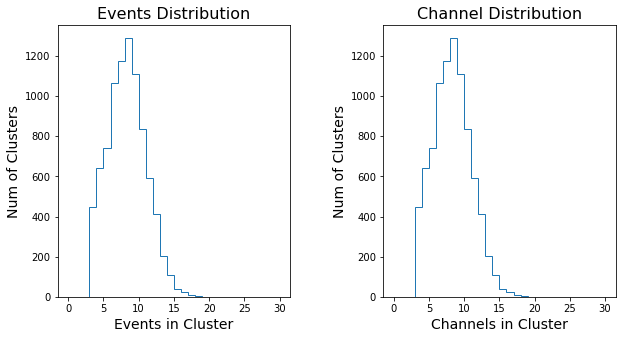

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
#fig.suptitle('Horizontally stacked subplots')
plt.subplots_adjust(wspace=.4)

ax1.set_title("Events Distribution", fontsize=16)
ax1.set_xlabel("Events in Cluster", fontsize=14)
ax1.set_ylabel("Num of Clusters", fontsize=14)
#ax1.hist(messydata.get_clusterdf()["Events"], np.linspace(0,30,31), histtype='step', color='r')
ax1.hist(mc.get_clusterdf()["Events"], np.linspace(0,30,31), histtype='step')



ax2.set_title("Channel Distribution", fontsize=16)
ax2.set_xlabel("Channels in Cluster", fontsize=14)
ax2.set_ylabel("Num of Clusters", fontsize=14)
#ax2.hist(messydata.get_clusterdf()["Channels"], np.linspace(0,30,31), histtype='step', color='r')
array = ax2.hist(mc.get_clusterdf()["Channels"], np.linspace(0,30,31), histtype='step')


#plt.savefig('plots/pdf/Event+Channel_Dist.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Event+Channel_Dist.png',dpi=300,bbox_inches = "tight")

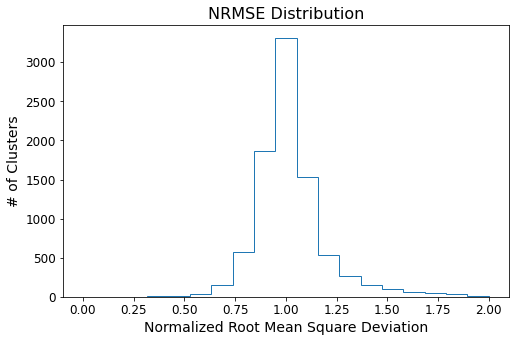

In [8]:
plt.figure(figsize=(8,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=12) #adjust fontsize of axis ticks
plt.title("NRMSE Distribution", fontsize=16)
plt.ylabel('# of Clusters',fontsize=14)
plt.xlabel('Normalized Root Mean Square Deviation',fontsize=14)

array=plt.hist(mc.get_clusterdf()['NRMSE'], np.linspace(0,2,20), histtype='step')

#plt.figure(figsize=(8,5))
#array=plt.hist(data.get_clusterdf()['NRMSE'], np.linspace(0,2,20), histtype='step')

#line = plt.axvline(1)

#plt.savefig('plots/pdf/NRMSE.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/NRMSE.png',dpi=300,bbox_inches = "tight")


#############################################################################################################
#
#plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
#plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
#plt.title("Filtered NRMSE Distribution", fontsize=18)
#plt.ylabel('# of Clusters',fontsize=16)
#plt.xlabel('Normalized Root Mean Square Deviation',fontsize=16)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

#array=plt.hist(clusterdata['Zenith(deg)'], np.linspace(0,180,181), histtype='step')


#line=plt.axvline(1)
#plt.gca().set_yscale("log")

#plt.savefig('plots/pdf/NRMSE.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/NRMSE.png',dpi=300,bbox_inches = "tight")

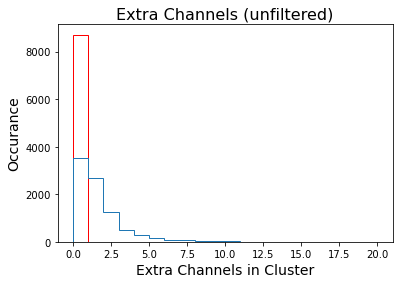

In [9]:
plt.figure()
plt.title("Extra Channels (unfiltered)", fontsize=16)
plt.xlabel("Extra Channels in Cluster", fontsize=14)
plt.ylabel("Occurance", fontsize=14)

array = plt.hist(mc.get_clusterdf()['ExtraCh'], np.linspace(0,20,21), color='r', histtype='step')
#plt.gca().set_yscale("log")

#plt.savefig('plots/pdf/Pre_ExtraChannels.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Pre_ExtraChannels.png',dpi=300,bbox_inches = "tight")


#plt.figure()
#plt.title("Extra Channels (filtered)", fontsize=16)
#plt.xlabel("Extra Channels in Cluster", fontsize=14)
#plt.ylabel("Occurance", fontsize=14)

array = plt.hist(data.get_clusterdf()['ExtraCh'], np.linspace(0,20,21), histtype='step')
#plt.gca().set_yscale("log")

#plt.savefig('plots/pdf/ExtraChannels.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/ExtraChannels.png',dpi=300,bbox_inches = "tight")

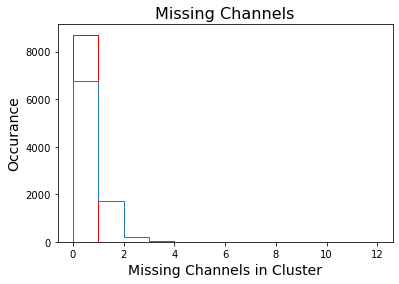

In [10]:
plt.figure()
plt.title("Missing Channels", fontsize=16)
plt.xlabel("Missing Channels in Cluster", fontsize=14)
plt.ylabel("Occurance", fontsize=14)
array = plt.hist(mc.get_clusterdf()['MissingCh'], np.linspace(0,12,13), color='r', histtype='step')

#plt.savefig('plots/pdf/Pre_MissingChannels.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Pre_MissingChannels.png',dpi=300,bbox_inches = "tight")


#plt.figure()
#plt.title("Missing Channels (filtered)", fontsize=16)
#plt.xlabel("Missing Channels in Cluster", fontsize=14)
#plt.ylabel("Occurance", fontsize=14)
array = plt.hist(data.get_clusterdf()['MissingCh'], np.linspace(0,12,13), histtype='step')

#plt.savefig('plots/pdf/MissingChannels.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/MissingChannels.png',dpi=300,bbox_inches = "tight")


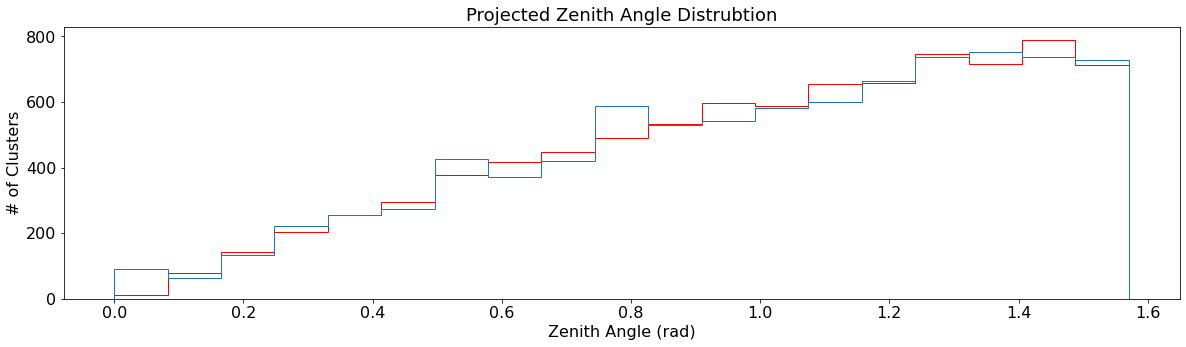

In [11]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Projected Zenith Angle Distrubtion", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Zenith Angle (rad)',fontsize=16)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

#array=plt.hist(clusterdata['Zenith(deg)'], np.linspace(0,100,40), histtype='step')
array=plt.hist(mc.get_clusterdf()['Zenith'], np.linspace(0,math.pi/2,20), histtype='step', color='r')
array=plt.hist(data.get_clusterdf()['Zenith'], np.linspace(0,math.pi/2,20), histtype='step')



#plt.savefig('plots/pdf/Zenith.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Zenith.png',dpi=300,bbox_inches = "tight")

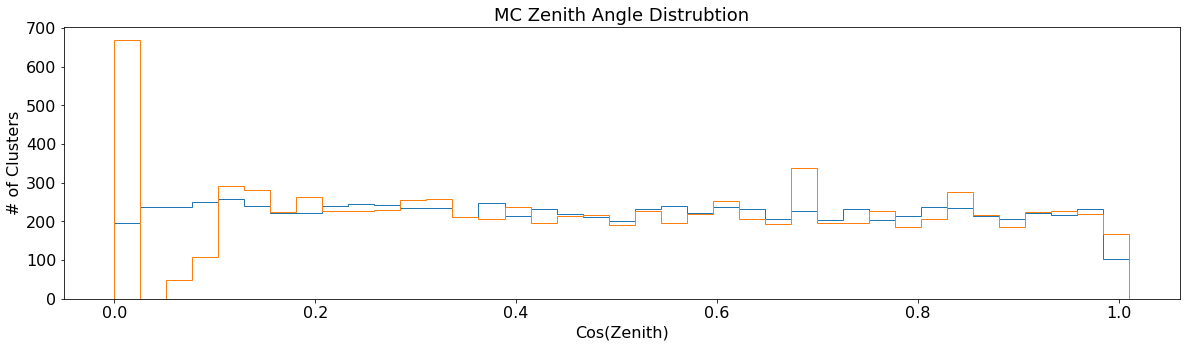

In [12]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("MC Zenith Angle Distrubtion", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Cos(Zenith)',fontsize=16)
array = plt.hist([math.cos(x) for x in mc.get_clusterdf()['Zenith']], np.linspace(0,1.01,40), histtype='step')
array = plt.hist([math.cos(x) for x in data.get_clusterdf()['Zenith']], np.linspace(0,1.01,40), histtype='step')


#plt.savefig('plots/pdf/CosZenith.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/CosZenith.png',dpi=300,bbox_inches = "tight")

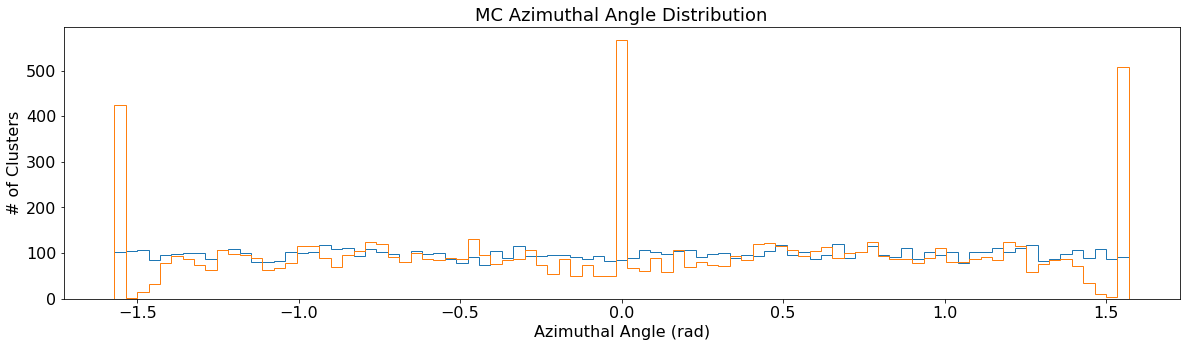

In [13]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("MC Azimuthal Angle Distribution", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Azimuthal Angle (rad)',fontsize=16)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

#array=plt.hist(clusterdata['Zenith(deg)'], np.linspace(0,100,40), histtype='step')
array=plt.hist(mc.get_clusterdf()['Azimuth'], np.linspace(-math.pi/2,math.pi/2,90), histtype='step')
array=plt.hist(data.get_clusterdf()['Azimuth'], np.linspace(-math.pi/2,math.pi/2,90), histtype='step')


#plt.savefig('plots/pdf/Azimuth.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Azimuth.png',dpi=300,bbox_inches = "tight")

In [14]:
threeormore = mc.get_clusterdf()[mc.get_clusterdf()['Channels'] >= 3]

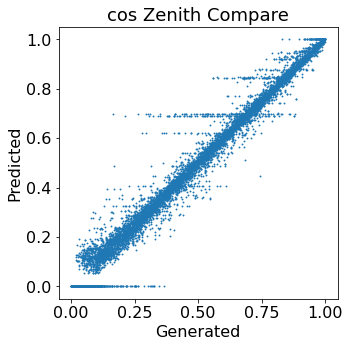

In [15]:

plt.figure(figsize=(5,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("cos Zenith Compare", fontsize=18)
plt.ylabel('Predicted',fontsize=16)
plt.xlabel('Generated',fontsize=16)

array = plt.scatter([math.cos(x) for x in threeormore['Zenith']], [math.cos(x) for x in data.get_clusterdf()['Zenith']], s=3, marker='.')

#[math.cos(x) for x in threeormore['Zenith']]



#array = plt.scatter(data.get_clusterdf()['Zenith'], data.get_clusterdf()['Azimuth'])



#plt.savefig('plots/pdf/Azimuth_vs_Zenith.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Azimuth_vs_Zenith.png',dpi=300,bbox_inches = "tight")

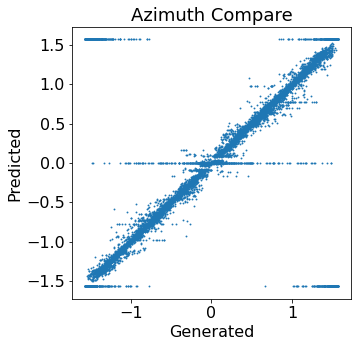

In [16]:

plt.figure(figsize=(5,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Azimuth Compare", fontsize=18)
plt.ylabel('Predicted',fontsize=16)
plt.xlabel('Generated',fontsize=16)

array = plt.scatter(threeormore['Azimuth'], data.get_clusterdf()['Azimuth'], s=3, marker='.')


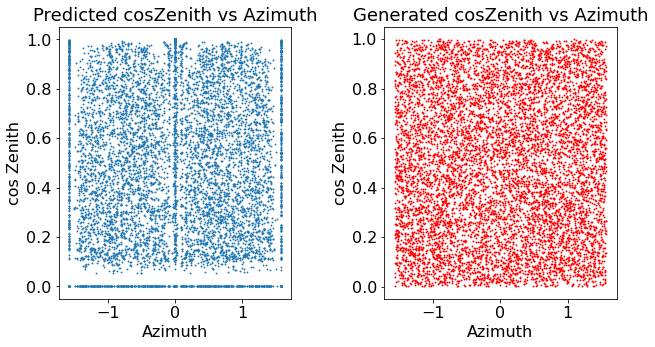

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
#fig.suptitle('Horizontally stacked subplots')
plt.subplots_adjust(wspace=.4)

#plt.figure(figsize=(5,5)) # lets you make a custom size for your plot
ax1.tick_params(labelsize=16) #adjust fontsize of axis ticks
ax1.set_title("Predicted cosZenith vs Azimuth", fontsize=18)
ax1.set_ylabel('cos Zenith',fontsize=16)
ax1.set_xlabel('Azimuth',fontsize=16)

array = ax1.scatter(data.get_clusterdf()['Azimuth'], [math.cos(x) for x in data.get_clusterdf()['Zenith']], marker='.', s=3)


#plt.figure(figsize=(5,5)) # lets you make a custom size for your plot
ax2.tick_params(labelsize=16) #adjust fontsize of axis ticks
ax2.set_title("Generated cosZenith vs Azimuth", fontsize=18)
ax2.set_ylabel('cos Zenith',fontsize=16)
ax2.set_xlabel('Azimuth',fontsize=16)

array = ax2.scatter(threeormore['Azimuth'],[math.cos(x) for x in threeormore['Zenith']], color='r',marker='.', s=3)




In [18]:
xdeltas = []
theta_deltas = []

for i in data.get_clusterdf()['Cluster'].values:

    dfit = data.fitline(data.get_cluster(i))
    mfit = mc.fitline(data.get_cluster(i))

    dv = dfit[1] - dfit[0]
    dv /= np.linalg.norm(dv)

    dm = mfit[1] - mfit[0]
    dm /= np.linalg.norm(dm)

    if dv.dot(dm) < 0:
        dm *= -1

    xdeltas.append(np.linalg.norm(dm - dv))
    
    theta = np.arccos(dv.dot(dm) / (np.linalg.norm(dv) * np.linalg.norm(dm)))
    
    theta = theta * 360 / (2 * math.pi)
    theta_deltas.append(theta)


AttributeError: 'numpy.float64' object has no attribute 'dot'

In [ ]:
np.mean(theta_deltas)

In [ ]:
plt.figure()
plt.title("Delta-Error Theta in Track Vector")

plt.ylabel("Count")
plt.xlabel("Delta (degrees)")

array = plt.hist(theta_deltas,  histtype='step', bins = 30)
plt.gca().set_yscale("log")

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

#plt.figure(figsize=(5,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Predicted cosZenith vs Azimuth", fontsize=18)
plt.ylabel('cos Zenith',fontsize=16)
plt.xlabel('Azimuth',fontsize=16)

array = plt.scatter(data.get_clusterdf()['Azimuth'], [math.cos(x) for x in data.get_clusterdf()['Zenith']])

xdata= data.get_clusterdf()['Azimuth'].values
ydata= [math.cos(x) for x in data.get_clusterdf()['Zenith'].values]
#x_bins= np.linspace(-math.pi/2,math.pi/2,20)
#y_bins= np.linspace(0,1,20)

counts,_,_= np.histogram2d(xdata, ydata, weights=theta_deltas, bins=(x_bins, y_bins))

pcolor=ax.pcolormesh(x_bins, y_bins, counts,norm=LogNorm())
#cbar=fig.colorbar(pcolor)



#h = plt.hist2d(xdata, ydata, bins=12,  weights=theta_deltas, cmap='cividis', norm=LogNorm())
cbar= plt.colorbar()


In [ ]:
data.get_clusterdf().loc[(data.get_clusterdf()['Channels'] >= 10) & (data.get_clusterdf()['MissingCh'] <= 3)]

In [ ]:
data.get_clusterdf().loc[(data.get_clusterdf()['MissingCh'] >= 10)]

In [ ]:
#plt.scatter(data.get_clusterdf()['Channels'], data.get_clusterdf()['ExtraCh'])
plt.hist2d(data.get_clusterdf()['Channels'], data.get_clusterdf()['ExtraCh'], cmap='cividis', norm=LogNorm())

In [ ]:
data.get_clusterdf()

In [ ]:
data.show_cluster(3)

In [ ]:
data.show_simulation(3)

In [19]:
mc.get_clusterdf()

,Cluster,Events,Channels,StartTime,TimeSpread,NRMSE,Zenith,Azimuth,ExtraCh,MissingCh,Fitline
0,0,8,8,5.468004e+04,0.0,0.919379,1.226294,-0.497038,0,0,"[312.611853, 137.931597, 53.942517, 0.827352, ..."
1,1,8,8,6.693737e+04,0.0,0.885457,1.448769,1.354644,0,0,"[165.465077, 73.194399, 310.01388, -0.212878, ..."
2,2,5,5,7.817201e+04,0.0,0.940746,1.260463,0.176738,0,0,"[17.542316, 279.152603, -243.805739, 0.937398,..."
3,3,6,6,8.072096e+04,0.0,0.935371,0.560187,0.376829,0,0,"[76.507954, -258.232574, 271.148359, -0.494064..."
4,4,6,6,9.219193e+04,0.0,0.628724,1.535449,-1.457128,0,0,"[133.15504, -212.171368, -1.995247, 0.113353, ..."
...,...,...,...,...,...,...,...,...,...,...,...
8705,8705,11,11,1.103383e+08,0.0,1.002044,0.275845,-0.482041,0,0,"[-75.462279, -158.893737, -52.398359, -0.24132..."
8706,8706,14,14,1.103514e+08,0.0,1.064252,0.863491,-0.830517,0,0,"[211.158341, -43.5483, -16.834544, -0.512693, ..."
8707,8707,8,8,1.103557e+08,0.0,0.849581,1.359910,-0.245713,0,0,"[268.099941, -106.344415, 69.582644, -0.948475..."
8708,8708,9,9,1.103823e+08,0.0,1.122720,1.430397,1.161911,0,0,"[-13.712408, -145.837478, 210.776455, 0.393675..."


In [21]:
mc.get_cluster(0)

,Run,Channel,Time,NumPulses,OFdelay,MaxPosInWindow,SelectedEnergy,Baseline,MaxToBaseline,StabAmp,Track,MaxTime,Cluster
0,0,335,54676.837243,1,3.2,3.2,0.0,-2000.0,12000.0,0.0,2,54680.037243,0
1,0,348,54676.837243,1,3.2,3.2,0.0,-2000.0,12000.0,0.0,2,54680.037243,0
2,0,361,54676.837243,1,3.2,3.2,0.0,-2000.0,12000.0,0.0,2,54680.037243,0
3,0,438,54676.837243,1,3.2,3.2,0.0,-2000.0,12000.0,0.0,2,54680.037243,0
4,0,451,54676.837243,1,3.2,3.2,0.0,-2000.0,12000.0,0.0,2,54680.037243,0
5,0,464,54676.837243,1,3.2,3.2,0.0,-2000.0,12000.0,0.0,2,54680.037243,0
6,0,541,54676.837243,1,3.2,3.2,0.0,-2000.0,12000.0,0.0,2,54680.037243,0
7,0,567,54676.837243,1,3.2,3.2,0.0,-2000.0,12000.0,0.0,2,54680.037243,0
